### Soybean (Large) Data Set

Source:

Origin:

R.S. Michalski and R.L. Chilausky
"Learning by Being Told and Learning from Examples: An Experimental Comparison of the Two Methods of Knowledge Acquisition in the Context of Developing an Expert System for Soybean Disease Diagnosis",
International Journal of Policy Analysis and Information Systems, Vol. 4, No. 2, 1980.

Donor:

Ming Tan & Jeff Schlimmer (Jeff.Schlimmer%cs.cmu.edu)

Data Set Information:

There are 19 classes, only the first 15 of which have been used in prior work. The folklore seems to be that the last four classes are unjustified by the data since they have so few examples. There are 35 categorical attributes, some nominal and some ordered. The value "dna'' means does not apply. The values for attributes are encoded numerically, with the first value encoded as "0,'' the second as "1,'' and so forth. An unknown values is encoded as "?''.

Attribute Information:

-- 19 Classes
diaporthe-stem-canker, charcoal-rot, rhizoctonia-root-rot,
phytophthora-rot, brown-stem-rot, powdery-mildew,
downy-mildew, brown-spot, bacterial-blight,
bacterial-pustule, purple-seed-stain, anthracnose,
phyllosticta-leaf-spot, alternarialeaf-spot,
frog-eye-leaf-spot, diaporthe-pod-&-stem-blight,
cyst-nematode, 2-4-d-injury, herbicide-injury.

1. date: april,may,june,july,august,september,october,?.
2. plant-stand: normal,lt-normal,?.
3. precip: lt-norm,norm,gt-norm,?.
4. temp: lt-norm,norm,gt-norm,?.
5. hail: yes,no,?.
6. crop-hist: diff-lst-year,same-lst-yr,same-lst-two-yrs,
same-lst-sev-yrs,?.
7. area-damaged: scattered,low-areas,upper-areas,whole-field,?.
8. severity: minor,pot-severe,severe,?.
9. seed-tmt: none,fungicide,other,?.
10. germination: 90-100%,80-89%,lt-80%,?.
11. plant-growth: norm,abnorm,?.
12. leaves: norm,abnorm.
13. leafspots-halo: absent,yellow-halos,no-yellow-halos,?.
14. leafspots-marg: w-s-marg,no-w-s-marg,dna,?.
15. leafspot-size: lt-1/8,gt-1/8,dna,?.
16. leaf-shread: absent,present,?.
17. leaf-malf: absent,present,?.
18. leaf-mild: absent,upper-surf,lower-surf,?.
19. stem: norm,abnorm,?.
20. lodging: yes,no,?.
21. stem-cankers: absent,below-soil,above-soil,above-sec-nde,?.
22. canker-lesion: dna,brown,dk-brown-blk,tan,?.
23. fruiting-bodies: absent,present,?.
24. external decay: absent,firm-and-dry,watery,?.
25. mycelium: absent,present,?.
26. int-discolor: none,brown,black,?.
27. sclerotia: absent,present,?.
28. fruit-pods: norm,diseased,few-present,dna,?.
29. fruit spots: absent,colored,brown-w/blk-specks,distort,dna,?.
30. seed: norm,abnorm,?.
31. mold-growth: absent,present,?.
32. seed-discolor: absent,present,?.
33. seed-size: norm,lt-norm,?.
34. shriveling: absent,present,?.
35. roots: norm,rotted,galls-cysts,?.

In [23]:
#First of all, we need to import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import normalize
from scipy.stats import norm
from sklearn.decomposition import PCA

%matplotlib inline

In [33]:
'Hello'

'Hello'

In [30]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-large.data")

soybean = pd.read_csv(target_url, header=None, prefix="V")
soybean.columns = ["class", "date", "plant-stand", "precip", "temp", "hail", "crop-hist", "area-damaged", "severity", "seed-tmt", "germination", "plant-growth", "leaves", "leafspots-halo", "leafspots-marg", "leafspot-size", "leaf-shread", "leaf-malf", "leaf-mild", "stem", "lodging", "stem-cankers", "canker-lesion", "fruiting-bodies", "external decay", "mycelium", "int-discolor", "sclerotia", "fruit-pods", "fruit spots", "seed", "mold-growth", "seed-discolor", "seed-size", "shriveling", "roots"]
soybean.head()

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


In [31]:
soybean.isnull().sum()

class              0
date               0
plant-stand        0
precip             0
temp               0
hail               0
crop-hist          0
area-damaged       0
severity           0
seed-tmt           0
germination        0
plant-growth       0
leaves             0
leafspots-halo     0
leafspots-marg     0
leafspot-size      0
leaf-shread        0
leaf-malf          0
leaf-mild          0
stem               0
lodging            0
stem-cankers       0
canker-lesion      0
fruiting-bodies    0
external decay     0
mycelium           0
int-discolor       0
sclerotia          0
fruit-pods         0
fruit spots        0
seed               0
mold-growth        0
seed-discolor      0
seed-size          0
shriveling         0
roots              0
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

def enc_labels(data):
    for i in data.columns:
        label.fit(data[i].drop_duplicates()) #задаем список значений для кодирования
        dicts[i] = list(label.classes_)
        data[i] = label.transform(data[i]) #заменяем значения из списка кодами закодированных элементов 
    return data

soybean_transformed = enc_labels(soybean)

,skewness,variables
7,0.021180,area-damaged
0,0.081001,class
19,0.113518,stem
13,0.187190,leafspots-halo
15,0.204702,leafspot-size
4,0.222374,temp
10,0.227879,germination
1,0.271410,date
6,0.308870,crop-hist
14,0.361357,leafspots-marg


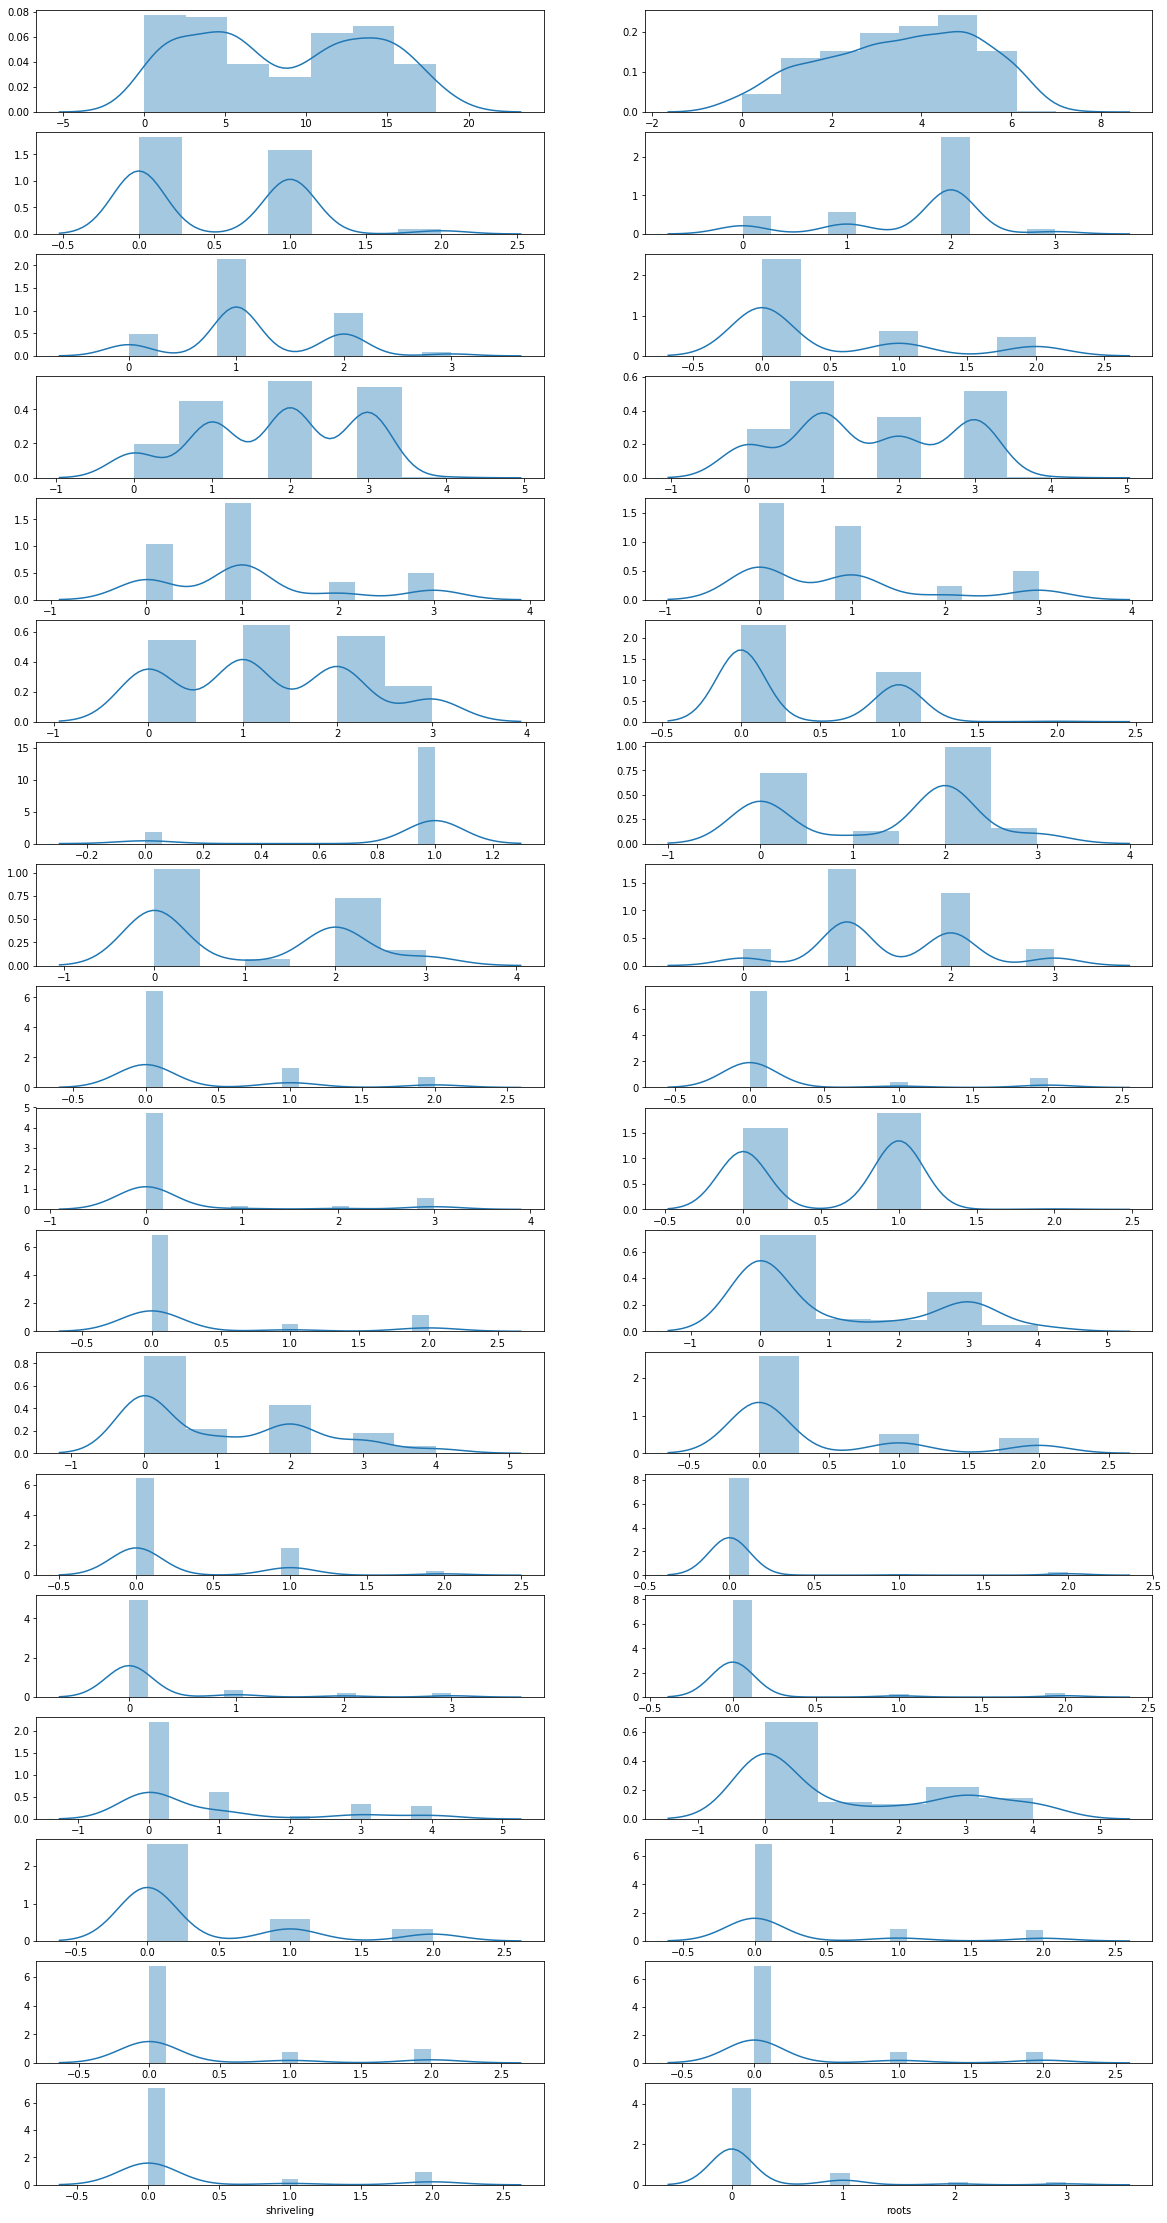

In [28]:
import math
def plot_distr(data_plot):
    fig, axes = plt.subplots(nrows=int(math.ceil((len(data_plot.columns)/2))), ncols=2,figsize=(20,40))
    for i, ax in enumerate(axes.flatten()):
        if i == len(data_plot.columns):
            break
        sns.distplot(data_plot.iloc[:,i], ax=ax)
        
plot_distr(soybean_transformed)

skness = skew(soybean_transformed)
skw = pd.DataFrame({'variables': soybean_transformed.columns, 'skewness': abs(skness)})
skw.sort_values('skewness')